# Exploratory Data Analysis on Terrorism

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 


Loading the terrorism dataset 

In [3]:
df = pd.read_csv("data/Terrorism_data.csv", encoding="latin1") # the dataset comes in latin1 encoding not UTF-8

/tmp/ipykernel_56575/2736603103.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Terrorism_data.csv", encoding="latin1") # the dataset comes in latin1 encoding not UTF-8


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Data Cleaning 

In [10]:
# we getting only the essential columns 
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [11]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [12]:
# we see that the columns are having bad namings, let rename them 
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"}, inplace=True)

/tmp/ipykernel_56575/1574873678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",


In [13]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181256 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [15]:
df.shape

(181691, 19)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7140.0,2006.261204,9.613689,1970.000000,2004.000000,2009.000000,2011.000000,2017.000000
Month,7140.0,6.551541,3.302383,1.000000,4.000000,6.000000,9.000000,12.000000
Day,7140.0,15.272129,8.816683,0.000000,8.000000,15.000000,23.000000,31.000000
Latitude,7140.0,25.980976,14.530867,-38.951872,12.955920,32.604393,34.949444,60.454957
Longitude,7140.0,29.969766,61.409995,-124.163673,3.829882,44.371773,71.999418,179.366667
Killed,7140.0,3.769188,10.658233,0.000000,0.000000,1.000000,3.000000,230.000000
Wounded,7140.0,6.838796,23.851877,0.000000,0.000000,1.000000,5.000000,1001.000000
Casualty,7140.0,10.607983,30.628314,0.000000,0.000000,2.000000,9.000000,1161.000000


In [16]:
# Let check for the nulls
df.isna().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 435
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [17]:
# there is a lot of nulls lets replace some with 0
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)

/tmp/ipykernel_56575/2219256620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Killed"]=df["Killed"].fillna(0)
/tmp/ipykernel_56575/2219256620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wounded"]=df["Wounded"].fillna(0)


In [18]:
df["Casualty"]=df["Killed"]+df["Wounded"]

/tmp/ipykernel_56575/2247654081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Casualty"]=df["Killed"]+df["Wounded"]


In [19]:
df.isna().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 435
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed                 0
Wounded                0
Add Notes         153402
Casualty               0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isna().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
Province/State    0
City              0
Latitude          0
Longitude         0
Location          0
Summary           0
Attack Type       0
Target Type       0
Group Name        0
Motive            0
Weapon Type       0
Killed            0
Wounded           0
Add Notes         0
Casualty          0
dtype: int64

In [27]:
# lets now describe data to make some statistics observations 
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000
mean,2006.261204,6.551541,15.272129,25.980976,29.969766,3.769188,6.838796,10.607983
std,9.613689,3.302383,8.816683,14.530867,61.409995,10.658233,23.851877,30.628314
min,1970.000000,1.000000,0.000000,-38.951872,-124.163673,0.000000,0.000000,0.000000
25%,2004.000000,4.000000,8.000000,12.955920,3.829882,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,32.604393,44.371773,1.000000,1.000000,2.000000
75%,2011.000000,9.000000,23.000000,34.949444,71.999418,3.000000,5.000000,9.000000
max,2017.000000,12.000000,31.000000,60.454957,179.366667,230.000000,1001.000000,1161.000000


### The statistical observations 


1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. The average of people killed in an event were: 3
3. Maximum number of people wounded in an event were: 1001
4. Maximum number of total casualties in an event were: 1161

## Visualizing the data

In [ ]:
# Total Casualties (Killed + Wounded) in each Year

In [33]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,74.0
1971,41.0
1972,25.0
1973,59.0
1974,51.0


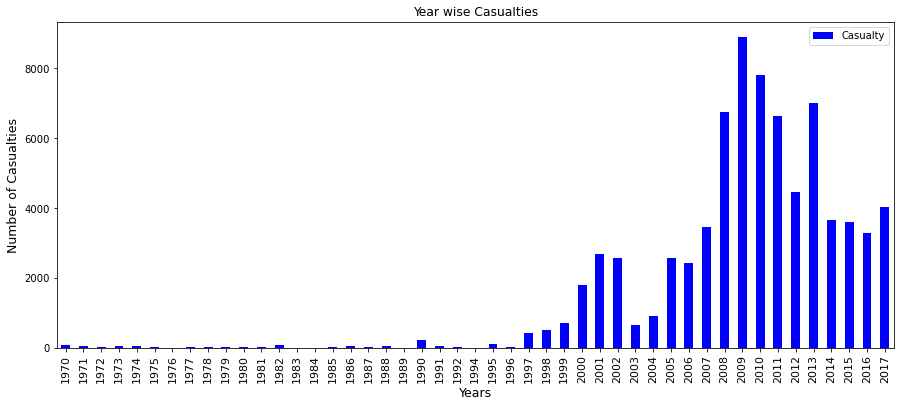

In [36]:
yc.plot(kind="bar", color="blue", figsize=(15,6))
plt.title("Year wise Casualties", fontsize=12.3)
plt.xlabel("Years", fontsize=12.5)
plt.ylabel("Number of Casualties", fontsize=12.5)
plt.xticks(fontsize=11)
plt.show()

In [37]:
# Killed in each Year
yearKilled = df[["Year","Killed"]].groupby("Year").sum()
yearKilled.head()

,Killed
Year,
1970,16.0
1971,5.0
1972,6.0
1973,31.0
1974,10.0


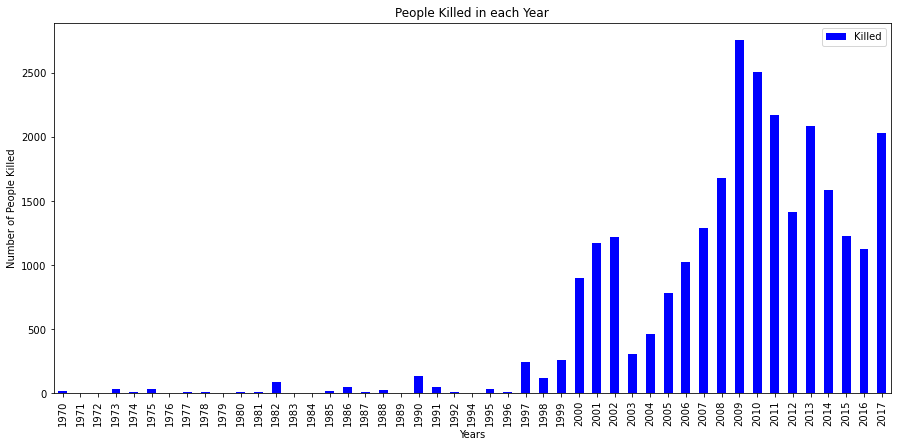

In [41]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)

#killed
yearKilled.plot(kind="bar",color="blue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 
plt.show()

In [43]:
# wounded in each Year
yearWounded = df[["Year","Wounded"]].groupby("Year").sum()
yearWounded.head()

,Wounded
Year,
1970,58.0
1971,36.0
1972,19.0
1973,28.0
1974,41.0


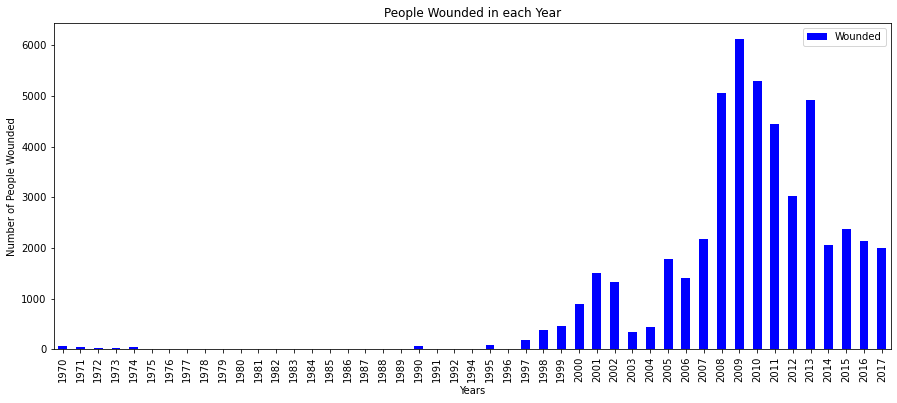

In [49]:

yearWounded.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("People Wounded in each Year")
plt.xlabel("Years")
plt.ylabel("Number of People Wounded")

plt.show()

### Region wise Attacks

In [50]:
# Distribution of Terrorist Attacks over Regions from 1970-2017
reg=pd.crosstab(df["Year"],df["Region"])
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,0,0,0,0,0,0,126,0,0,0,0,0
1971,0,0,0,0,0,0,58,0,0,0,0,0
1972,0,0,0,0,0,0,35,0,0,0,0,1
1973,0,0,0,0,0,0,18,0,0,0,0,0
1974,0,0,0,0,0,0,27,0,0,0,0,0


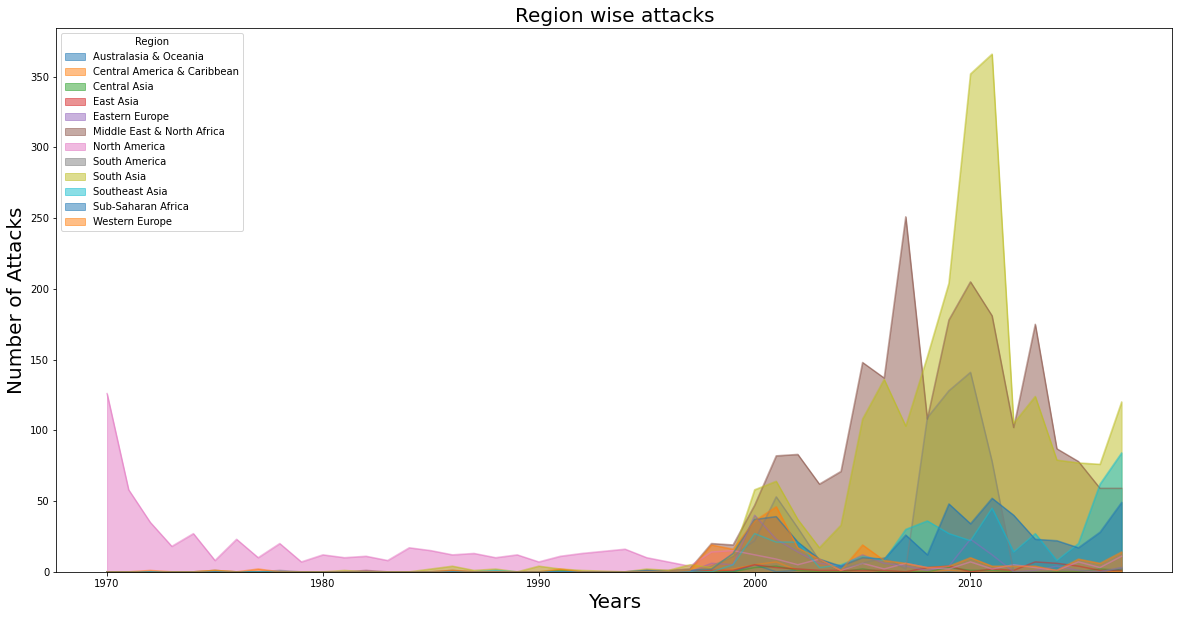

In [51]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [52]:
# Total Terrorist Attacks in each Region from 1970-2017
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
South Asia                     2252
Middle East & North Africa     2159
North America                   643
South America                   611
Sub-Saharan Africa              497
Southeast Asia                  477
Western Europe                  244
Eastern Europe                  169
East Asia                        45
Central Asia                     19
Central America & Caribbean      16
Australasia & Oceania             8
Name: Total, dtype: int64

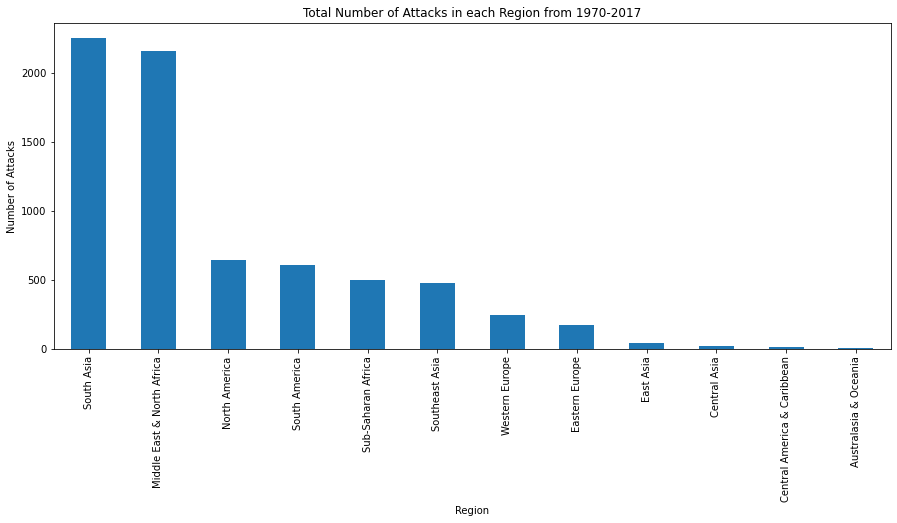

In [53]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [54]:
# Killed in each region
regionkilled=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
regionkilled

,Killed
Region,
Middle East & North Africa,10245.0
South Asia,9490.0
Sub-Saharan Africa,4435.0
Southeast Asia,648.0
South America,642.0
Eastern Europe,501.0
East Asia,365.0
Western Europe,320.0
North America,203.0


In [55]:
# wounded per region 
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,21438.0
South Asia,17290.0
Sub-Saharan Africa,3369.0
Southeast Asia,2196.0
Western Europe,1839.0
South America,951.0
Eastern Europe,696.0
North America,615.0
East Asia,356.0


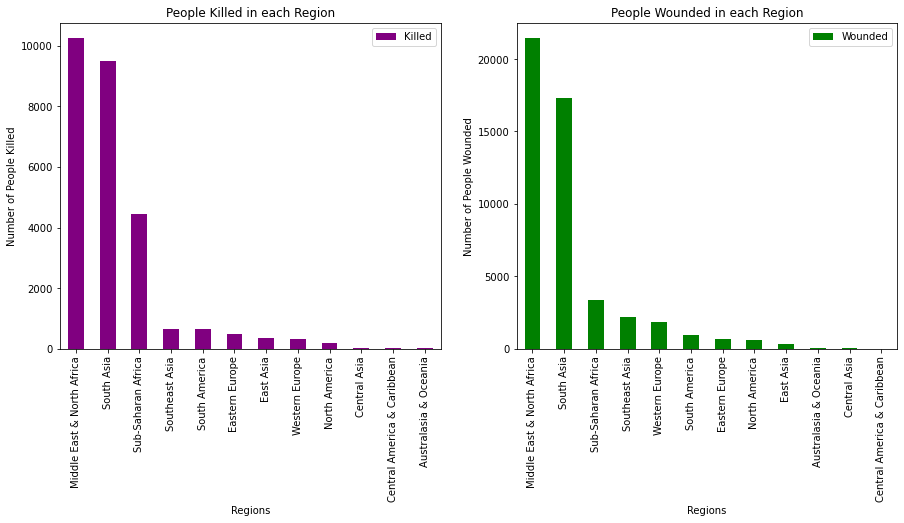

In [56]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
regionkilled.plot(kind="bar",color="purple",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### Country wise Attacks - Top 10

In [57]:
# Number of Attacks in each Country
ct=df["Country"].value_counts().head(10)
ct

Country
Iraq             1166
India             781
United States     621
Pakistan          616
Colombia          570
Algeria           550
Afghanistan       466
Sri Lanka         295
Thailand          183
Philippines       180
Name: count, dtype: int64

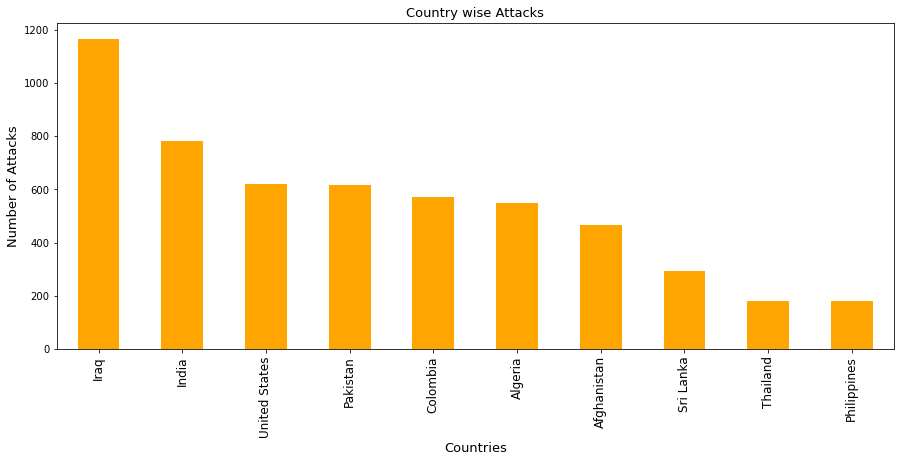

In [58]:
ct.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [59]:
# Killed in each Country
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
Iraq,6904.0
Pakistan,3695.0
Afghanistan,2457.0
India,1863.0
Nigeria,1534.0
Sri Lanka,1375.0
Algeria,1355.0
Colombia,599.0
Sudan,545.0


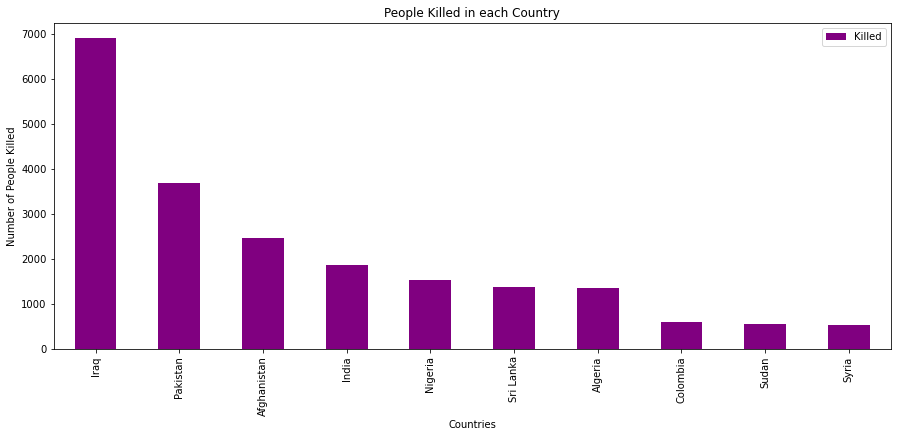

In [61]:

cnk[:10].plot(kind="bar",color="purple",figsize=(15,6))
plt.title("People Killed in each Country")
plt.xlabel("Countries")
plt.ylabel("Number of People Killed")
plt.show()

###  City wise Attacks - Top 10

In [62]:
# Number of Attacks in each city
city=df["City"].value_counts().head(10)
city

City
Baghdad          571
Unknown          163
Karachi          134
New York City    105
Kabul             79
Mogadishu         74
Mosul             74
Quetta            61
Kirkuk            55
Peshawar          53
Name: count, dtype: int64

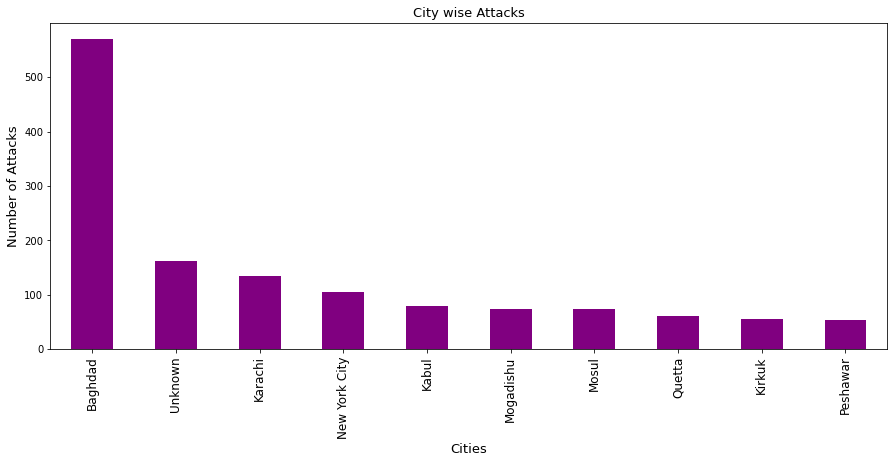

In [63]:
city.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [64]:
# Total Casualties (Killed + Wounded) in each City
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Baghdad,12239.0
Kabul,2153.0
Karachi,1338.0
Lahore,1327.0
Peshawar,1293.0
Quetta,1214.0
N'Djamena,1161.0
Mosul,1045.0
London,974.0


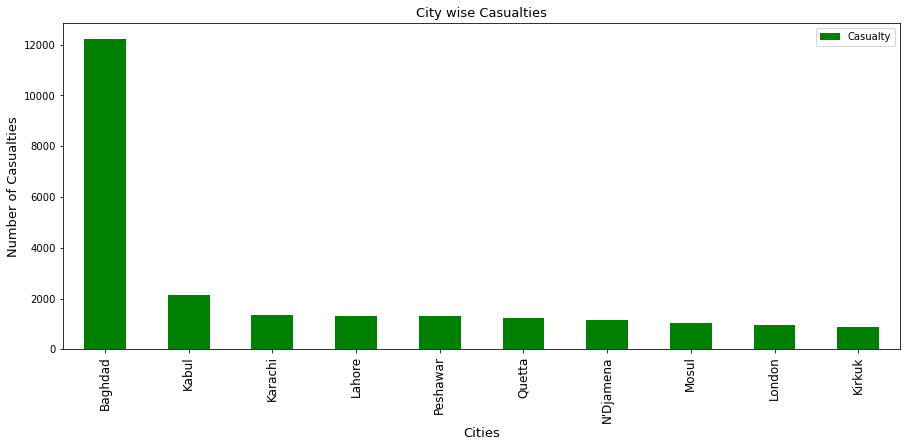

In [66]:
cc[:10].plot(kind="bar",color="green",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [67]:
 ## ongoing ....